In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 数据获取

In [2]:
data = pd.read_csv("./data/otto/train.csv")

In [3]:
data.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

    ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0   ...           1        0        0        0        0        0        0   
1   ...           0        0        0        0        0        0        0   
2   ...           0        0        0        0        0        0        0   
3   ...           0        1        2        0        0        0        0   
4   ...           1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [4]:
data.shape

(61878, 95)

In [5]:
data.describe()

id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.255770      3.474822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max       19.000000     10.000000     38.000000     76.000000     43.000000   

           ...            feat_84       feat_85       feat_86       feat_87  \
count      ...       61878.000000  61878.000000  61878.000000  61878.000000   
mean       ...           0.070752      0.532306      1.128576      0.393549   
std        ...           1.151460      1.900438      2.681554      1.575455   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      1.000000      0.000000   
max        ...          76.000000     55.000000     65.000000     67.000000   

            feat_88       feat_89       feat_90       feat_91       feat_92  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.874915      0.457772      0.812421      0.264941      0.380119   
std        2.115466      1.527385      4.597804      2.045646      0.982385   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max       30.000000     61.000000    130.000000     52.000000     19.000000   

            feat_93  
count  61878.000000  
mean       0.126135  
std        1.201720  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       87.000000  

[8 rows x 94 columns]

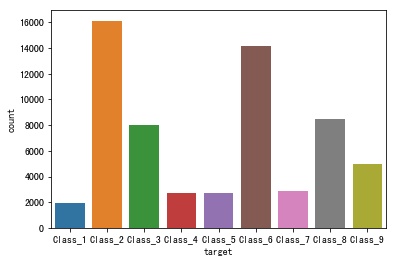

In [7]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(data.target)

plt.show()

由上图可以看出,该数据类别不均衡,所以需要后期处理

# 数据基本处理

数据已经经过脱敏,不再需要特殊处理

## 截取部分数据

In [8]:
new1_data = data[:10000]
new1_data.shape

(10000, 95)

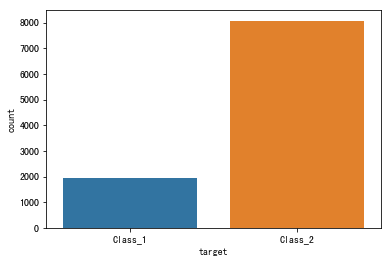

In [9]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(new1_data.target)

plt.show()

使用上面方式获取数据不可行,然后使用随机欠采样获取响应的数据

In [10]:
# 随机欠采样获取数据
# 首先需要确定特征值\标签值

y = data["target"]
x = data.drop(["id", "target"], axis=1)

In [11]:
x.head()

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       1       0   
2       0       0       0       0       0       0       0       1       0   
3       1       0       0       1       6       1       5       0       0   
4       0       0       0       0       0       0       0       0       0   

   feat_10   ...     feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  \
0        0   ...           0        1        0        0        0        0   
1        0   ...           0        0        0        0        0        0   
2        0   ...           0        0        0        0        0        0   
3        1   ...          22        0        1        2        0        0   
4        0   ...           0        1        0        0        0        0   

   feat_90  feat_91  feat_92  feat_93  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        1        0        0        0  

[5 rows x 93 columns]

In [12]:
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [14]:
# 欠采样获取数据
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(x, y)

In [15]:
x.shape, y.shape

((61878, 93), (61878,))

In [16]:
X_resampled.shape, y_resampled.shape

((17361, 93), (17361,))

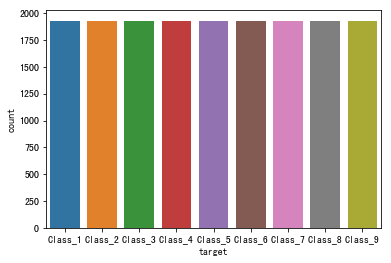

In [17]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(y_resampled)

plt.show()

## 把标签值转换为数字

In [18]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)


In [20]:
y_resampled

array([0, 0, 0, ..., 8, 8, 8])

## 分割数据

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [23]:
x_train.shape, y_train.shape

((13888, 93), (13888,))

In [24]:
x_test.shape, y_test.shape

((3473, 93), (3473,))

# 模型训练

## 基本模型训练

In [26]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pre = rf.predict(x_test)
y_pre

array([7, 7, 0, ..., 1, 1, 0])

In [29]:
rf.score(x_test, y_test)

0.7782896631154621

In [30]:
rf.oob_score_

0.7659850230414746

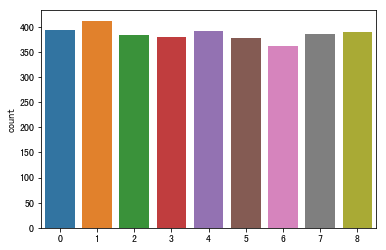

In [31]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(y_pre)

plt.show()

In [33]:
# logloss模型评估
from sklearn.metrics import log_loss

log_loss(y_test, y_pre, eps=1e-15, normalize=True)


ValueError: y_true and y_pred contain different number of classes 9, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4 5 6 7 8]

In [35]:
y_test, y_pre

(array([7, 7, 8, ..., 1, 1, 0]), array([7, 7, 0, ..., 1, 1, 0]))

上面报错原因:logloss使用过程中,必须要求将输出用one-hot表示,
    
需要将这个多类别问题的输出结果通过OneHotEncoder修改为如下:

In [37]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

y_test1 = one_hot.fit_transform(y_test.reshape(-1, 1))
y_pre1 = one_hot.fit_transform(y_pre.reshape(-1, 1))


In [38]:
y_test1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_pre1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
# logloss模型评估

log_loss(y_test1, y_pre1, eps=1e-15, normalize=True)

7.65760375009538

In [41]:
# 改变预测值的输出模式,让输出结果为百分占比,降低logloss值
y_pre_proba = rf.predict_proba(x_test)

In [42]:
y_pre_proba

array([[0.04, 0.  , 0.  , ..., 0.01, 0.92, 0.01],
       [0.03, 0.02, 0.03, ..., 0.2 , 0.48, 0.08],
       [0.41, 0.06, 0.06, ..., 0.05, 0.04, 0.31],
       ...,
       [0.  , 0.49, 0.28, ..., 0.02, 0.  , 0.01],
       [0.01, 0.54, 0.09, ..., 0.  , 0.  , 0.02],
       [0.31, 0.03, 0.02, ..., 0.11, 0.13, 0.13]])

In [43]:
rf.oob_score_

0.7659850230414746

In [44]:
# logloss模型评估

log_loss(y_test1, y_pre_proba, eps=1e-15, normalize=True)

0.747188586960504

## 模型调优

n_estimators, max_feature, max_depth, min_samples_leaf

### 确定最优的n_estimators

In [45]:
# 确定n_estimators的取值范围
tuned_parameters = range(10, 200, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=one_parameter, 
                                 max_depth=10, 
                                 max_features=10, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)


/Users/sherwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[1.1363637 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]


/Users/sherwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[1.1363637  1.12502792 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1363637  1.12502792 1.12888587 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1363637  1.12502792 1.12888587 1.12663772 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1363637  1.12502792 1.12888587 1.12663772 1.12185466 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1363637  1.12502792 1.12888587 1.12663772 1.12185466 1.11919361
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1363637  1.12502792 1.12888587 1.126637

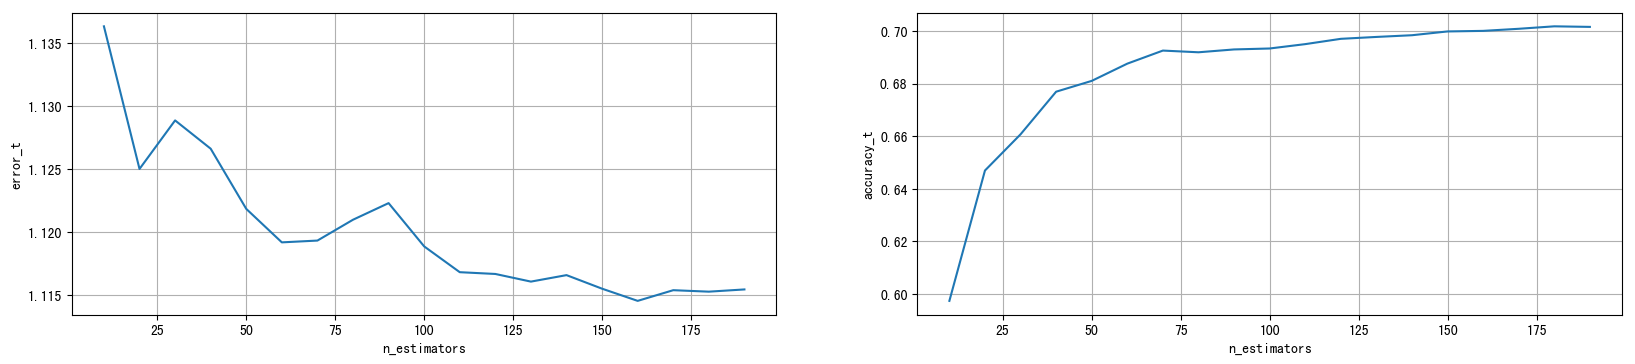

In [50]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)


plt.show()

经过图像展示,最后确定n_estimators=175的时候,表现效果不错

### 确定最优的max_features

In [51]:
# 确定n_estimators的取值范围
tuned_parameters = range(5, 40, 5)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=10, 
                                 max_features=one_parameter, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)


[1.21048299 0.         0.         0.         0.         0.
 0.        ]
[1.21048299 1.11570883 0.         0.         0.         0.
 0.        ]
[1.21048299 1.11570883 1.08477789 0.         0.         0.
 0.        ]
[1.21048299 1.11570883 1.08477789 1.06988755 0.         0.
 0.        ]
[1.21048299 1.11570883 1.08477789 1.06988755 1.06604809 0.
 0.        ]
[1.21048299 1.11570883 1.08477789 1.06988755 1.06604809 1.05863125
 0.        ]
[1.21048299 1.11570883 1.08477789 1.06988755 1.06604809 1.05863125
 1.06050897]


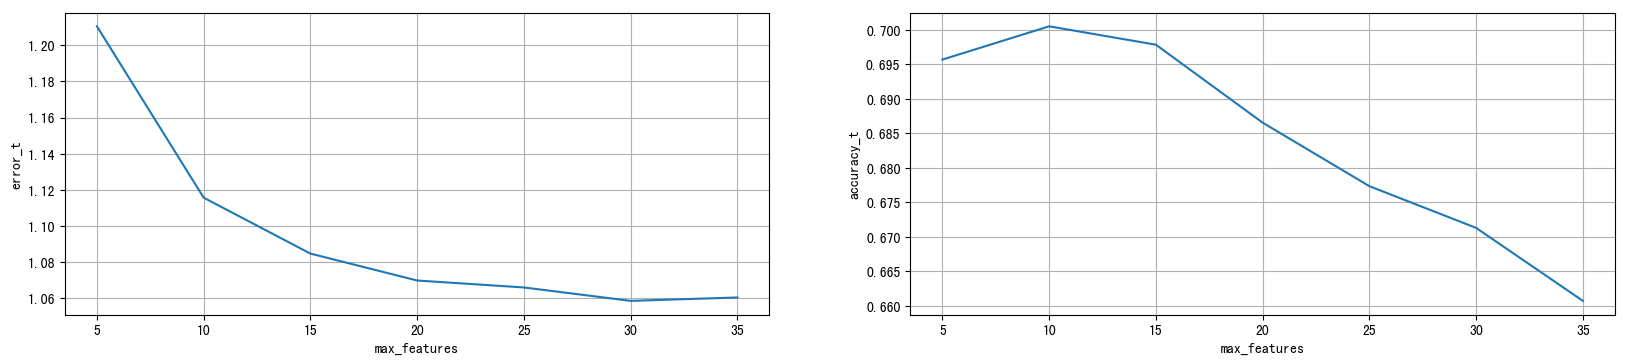

In [52]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_features")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_features")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)


plt.show()

经过图像展示,最后确定max_features=15的时候,表现效果不错

### 确定最优的max_depth

In [53]:
# 确定n_estimators的取值范围
tuned_parameters = range(10, 100, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=one_parameter, 
                                 max_features=15, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)


[1.08477789 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[1.08477789 0.85395849 0.         0.         0.         0.
 0.         0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.         0.         0.
 0.         0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.         0.
 0.         0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.8302702  0.
 0.         0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.8302702  0.8302702
 0.         0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.8302702  0.8302702
 0.8302702  0.         0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.8302702  0.8302702
 0.8302702  0.8302702  0.        ]
[1.08477789 0.85395849 0.82965202 0.83011988 0.8302702  0.8302702
 0.8302702  0.8302702  0.8302702 ]


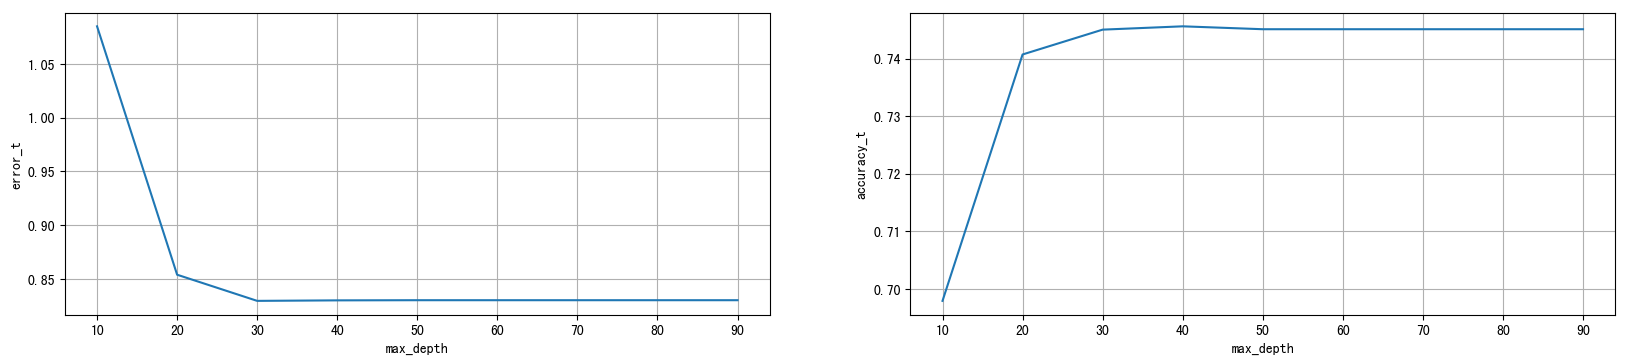

In [54]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)


plt.show()

经过图像展示,最后确定max_depth=30的时候,表现效果不错

### 确定最优的min_sample_leaf

In [56]:
# 确定n_estimators的取值范围
tuned_parameters = range(1, 10, 2)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=30, 
                                 max_features=15, 
                                 min_samples_leaf=one_parameter, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)


[0.71382973 0.         0.         0.         0.        ]
[0.71382973 0.74611594 0.         0.         0.        ]
[0.71382973 0.74611594 0.77748299 0.         0.        ]
[0.71382973 0.74611594 0.77748299 0.80311457 0.        ]
[0.71382973 0.74611594 0.77748299 0.80311457 0.82513751]


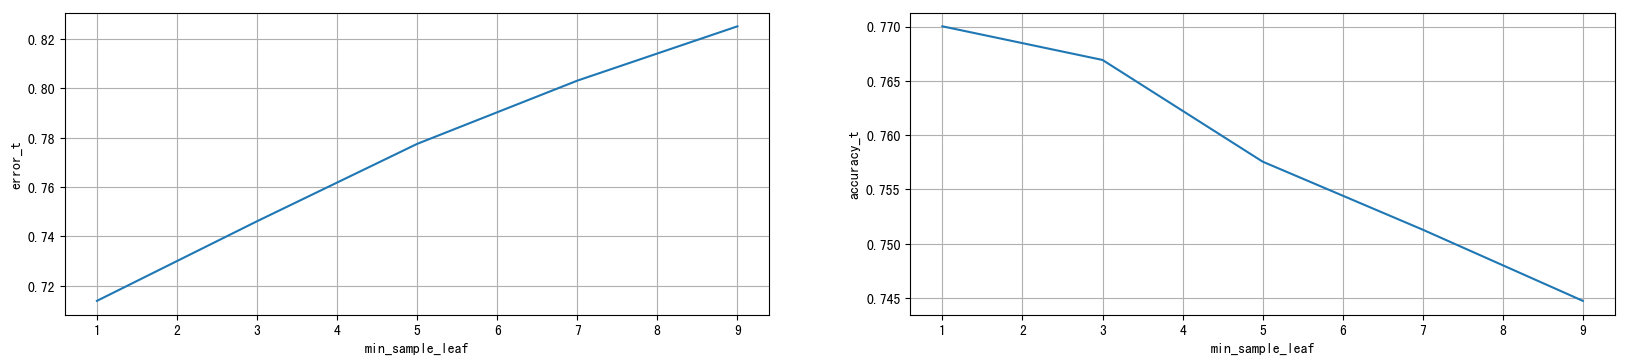

In [57]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("min_sample_leaf")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("min_sample_leaf")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)


plt.show()

经过图像展示,最后确定min_sample_leaf=1的时候,表现效果不错

## 确定最优模型

n_estimators=175,

max_depth=30,

max_features=15,

min_samples_leaf=1, 


In [59]:
rf3 = RandomForestClassifier(n_estimators=175, max_depth=30, max_features=15, min_samples_leaf=1, 
                             oob_score=True, random_state=40, n_jobs=-1)

rf3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=40, verbose=0,
                       warm_start=False)

In [60]:
rf3.score(x_test, y_test)

0.7837604376619637

In [61]:
rf3.oob_score_

0.7746255760368663

In [62]:
y_pre_proba1 = rf3.predict_proba(x_test)

log_loss(y_test, y_pre_proba1)

0.7113183040048942

# 生成提交数据

In [63]:
test_data = pd.read_csv("./data/otto/test.csv")

In [64]:
test_data.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       0       0       0       0       0       0       0       0       0   
1   2       2       2      14      16       0       0       0       0       0   
2   3       0       1      12       1       0       0       0       0       0   
3   4       0       0       0       1       0       0       0       0       0   
4   5       1       0       0       1       0       0       1       2       0   

    ...     feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  \
0   ...           0        0       11        1       20        0        0   
1   ...           0        0        0        0        0        4        0   
2   ...           0        0        0        0        2        0        0   
3   ...           0        3        1        0        0        0        0   
4   ...           0        0        0        0        0        0        0   

   feat_91  feat_92  feat_93  
0        0        0        0  
1        0        2        0  
2        0        0        1  
3        0        0        0  
4        9        0        0  

[5 rows x 94 columns]

In [65]:
test_data_drop_id = test_data.drop(["id"], axis=1)
test_data_drop_id.head()

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       0       0       0       0       0       0       0       0       0   
1       2       2      14      16       0       0       0       0       0   
2       0       1      12       1       0       0       0       0       0   
3       0       0       0       1       0       0       0       0       0   
4       1       0       0       1       0       0       1       2       0   

   feat_10   ...     feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  \
0        3   ...           0        0       11        1       20        0   
1        0   ...           0        0        0        0        0        4   
2        0   ...           0        0        0        0        2        0   
3        0   ...           0        3        1        0        0        0   
4        3   ...           0        0        0        0        0        0   

   feat_90  feat_91  feat_92  feat_93  
0        0        0        0        0  
1        0        0        2        0  
2        0        0        0        1  
3        0        0        0        0  
4        0        9        0        0  

[5 rows x 93 columns]

In [66]:
y_pre_test = rf3.predict_proba(test_data_drop_id)

In [67]:
y_pre_test

array([[3.42857143e-02, 4.00000000e-02, 6.00000000e-02, ...,
        4.01785714e-02, 5.71428571e-03, 2.28571429e-02],
       [1.14285714e-01, 4.00000000e-02, 3.42857143e-02, ...,
        2.85714286e-02, 2.17142857e-01, 2.85714286e-02],
       [5.71428571e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.71428571e-03, 0.00000000e+00],
       ...,
       [1.72644377e-02, 2.48465399e-01, 4.16172412e-01, ...,
        3.42857143e-02, 1.21580547e-04, 5.71428571e-03],
       [1.72287863e-02, 3.06668815e-01, 1.07797351e-01, ...,
        3.93841747e-04, 0.00000000e+00, 5.71428571e-03],
       [1.92414742e-02, 2.14828481e-01, 3.61958916e-01, ...,
        1.60309793e-01, 0.00000000e+00, 1.63868444e-03]])

In [68]:
result_data = pd.DataFrame(y_pre_test, columns=["Class_"+str(i) for i in range(1, 10)])

In [69]:
result_data.head()

Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.034286  0.040000  0.060000  0.774107  0.000000  0.022857  0.040179   
1  0.114286  0.040000  0.034286  0.034286  0.017143  0.485714  0.028571   
2  0.005714  0.000000  0.000000  0.000000  0.000000  0.988571  0.000000   
3  0.027714  0.215714  0.300000  0.277143  0.000000  0.000000  0.017143   
4  0.237060  0.000080  0.005834  0.000000  0.005954  0.023057  0.018190   

    Class_8   Class_9  
0  0.005714  0.022857  
1  0.217143  0.028571  
2  0.005714  0.000000  
3  0.006286  0.156000  
4  0.199658  0.510166

In [70]:
result_data.insert(loc=0, column="id", value=test_data.id)

In [71]:
result_data.head()

id   Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0   1  0.034286  0.040000  0.060000  0.774107  0.000000  0.022857  0.040179   
1   2  0.114286  0.040000  0.034286  0.034286  0.017143  0.485714  0.028571   
2   3  0.005714  0.000000  0.000000  0.000000  0.000000  0.988571  0.000000   
3   4  0.027714  0.215714  0.300000  0.277143  0.000000  0.000000  0.017143   
4   5  0.237060  0.000080  0.005834  0.000000  0.005954  0.023057  0.018190   

    Class_8   Class_9  
0  0.005714  0.022857  
1  0.217143  0.028571  
2  0.005714  0.000000  
3  0.006286  0.156000  
4  0.199658  0.510166

In [72]:
result_data.to_csv("./data/otto/submission.csv", index=False)